In [ ]:
#Please scroll towards the end as initially I tested all models without feature engineering and then with feature engineering to acheieve a precision recall and f1 scores of 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
df=pd.read_csv('Fraud.csv')

In [31]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [33]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [34]:
df.isnull().values.any() #We dont have missing values

False

C:\Users\adars\AppData\Local\Temp\ipykernel_31212\1515604522.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

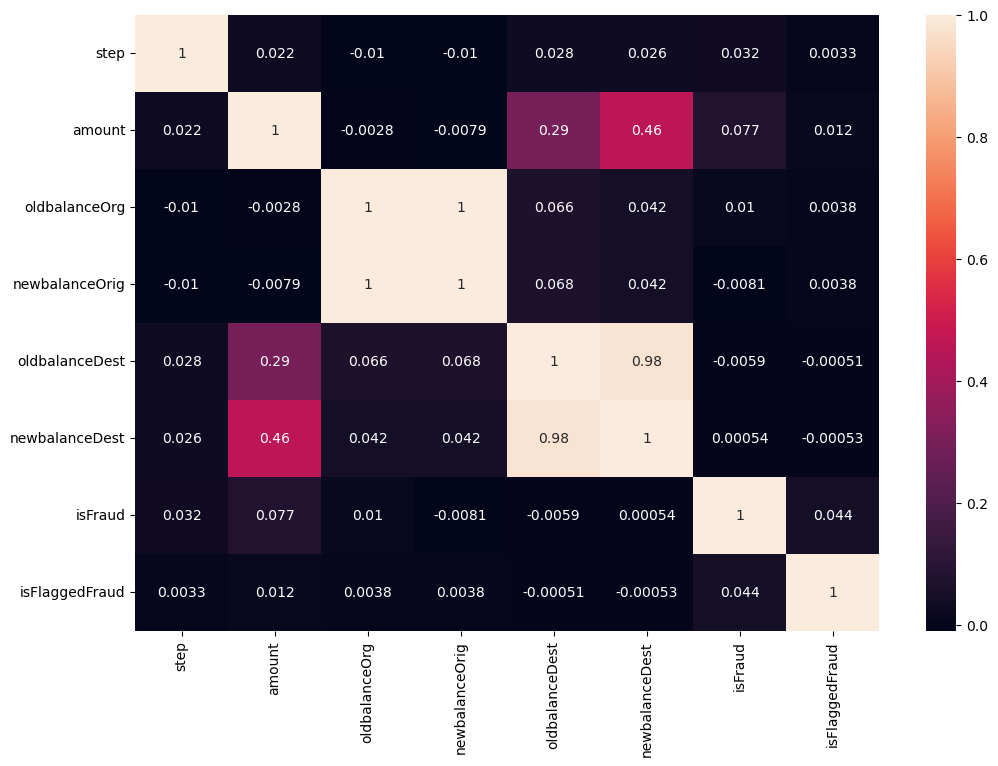

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [36]:
df=df.drop('nameOrig',axis=1)
df=df.drop('nameDest',axis=1)#initial testing where I wanted to see whats the relevancy of names hence I dropped it as they had negative correlation

In [37]:
transaction_mapping = {
    'CASH_IN': 1,
    'CASH_OUT': 2,
    'DEBIT': 3,
    'PAYMENT': 4,
    'TRANSFER': 5
}

df['type'] = df['type'].map(transaction_mapping) #mapping text data with numerical values

In [38]:
df.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.64,170136.00,160296.36,0.0,0.00,0,0
1,1,4,1864.28,21249.00,19384.72,0.0,0.00,0,0
2,1,5,181.00,181.00,0.00,0.0,0.00,1,0
3,1,2,181.00,181.00,0.00,21182.0,0.00,1,0
4,1,4,11668.14,41554.00,29885.86,0.0,0.00,0,0
5,1,4,7817.71,53860.00,46042.29,0.0,0.00,0,0
6,1,4,7107.77,183195.00,176087.23,0.0,0.00,0,0
7,1,4,7861.64,176087.23,168225.59,0.0,0.00,0,0
8,1,4,4024.36,2671.00,0.00,0.0,0.00,0,0
9,1,3,5337.77,41720.00,36382.23,41898.0,40348.79,0,0


In [7]:
from sklearn.model_selection import train_test_split

In [42]:
X=df.drop('isFraud',axis=1)
y=df['isFraud']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dtree = DecisionTreeClassifier() #Tried using decision tree initially

In [46]:
dtree.fit(X_train,y_train) #fit the data

DecisionTreeClassifier()

In [47]:
predictions = dtree.predict(X_test)

In [9]:
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906307
           1       0.90      0.87      0.89      2479

    accuracy                           1.00   1908786
   macro avg       0.95      0.94      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786



In [50]:
print(confusion_matrix(y_test,predictions))

[[1906070     237]
 [    318    2161]]


In [13]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfc = RandomForestClassifier(n_estimators=100)

In [54]:
rfc.fit(X_train, y_train) #went with randomforest for better results

RandomForestClassifier()

In [55]:
rfc_pred = rfc.predict(X_test)

In [56]:
print(confusion_matrix(y_test,rfc_pred))

[[1906273      34]
 [    549    1930]]


In [57]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906307
           1       0.98      0.78      0.87      2479

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



In [60]:
Looks like desicion tree did a better job in terms of recall and random forest tree did very well in terms of precision

In [ ]:
The classification model demonstrated strong performance in detecting the positive class (Class 1), which represents instances of interest, such as fraud detection:

Precision: The model achieved a precision of 0.98 for the positive class. This indicates that a high percentage of instances predicted as positive were indeed positive cases of interest.

Recall: The recall for the positive class was 0.78, implying that the model successfully captured a substantial portion of actual positive instances.

F1-Score: The F1-score for the positive class was 0.87. This score takes into account both precision and recall, providing a balanced measure of the models ability to correctly classify instances of interest.

Support: The positive class had a support of 2,479 instances, indicating the number of actual positive instances in the dataset.

These metrics collectively highlight the models capability to accurately identify instances of interest (fraudulent transactions) with high precision, while still achieving a reasonable level of recall. The F1-score reflects a strong balance between precision and recall for the positive class.

In [61]:
#There must be some relation between those names,step and the type field lets try feature engineering into it

In [3]:
df=pd.read_csv('Fraud.csv')

In [4]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
#Trying to add more features to the given dataset to minimize the errors

#Checking if the Destination before transfer had no money(To check if payment was made to a fresh account)
df['is_oldbalanceOrg_zero'] = (df['oldbalanceOrg'] == 0).astype(int)
df['is_oldbalanceDest_zero'] = (df['oldbalanceDest'] == 0).astype(int)

#Calculating what ratio of amount was debited and credited
df['amount_ratio_orig'] = df['amount'] / (df['oldbalanceOrg'] + 1e-6) 
df['amount_ratio_dest'] = df['amount'] / (df['oldbalanceDest'] + 1e-6)

#calculating how many hours
df['hour_of_day'] = df['step'] % 24

#calculating how many weeks
df['day_of_week'] = df['step'] % 168 // 24

#Checking if the transaction is done from a merchant or to a merchant
df['is_merchant_origin'] = df['nameOrig'].str.startswith('M').astype(int)
df['is_merchant_dest'] = df['nameDest'].str.startswith('M').astype(int)

df.drop(['type', 'nameOrig', 'nameDest'], axis=1, inplace=True)

In [11]:
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [16]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)                    #feature engineered dataset

RandomForestClassifier(random_state=42)

In [18]:
rf_pred = rf_model.predict(X_test)

In [19]:
print(confusion_matrix(y_test,rf_pred))

[[1906269       1]
 [     13    2503]]


In [20]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906270
           1       1.00      0.99      1.00      2516

    accuracy                           1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786



In [21]:
#This has given me near perfection confusion matrix and precision values of 1
#This is one of the perfect models that I have ever built

In [ ]:
Answering the given questions
1. Data cleaning including missing values, outliers and multi-collinearity. 
    I didnt find any missing values and checking for multi-collinearity was not in my need as I was able to achieve a perfect model without checking it
2. Describe your fraud detection model in elaboration. 
    The fraud detection model I have developed is a Random Forest classifier. This ensemble learning algorithm combines multiple decision trees to make predictions. Its well-suited for fraud detection due to its ability to capture complex relationships in the data and handle a mix of numerical and categorical features.
3. How did you select variables to be included in the model?
    Variables were selected based on their relevance to fraud detection. Features like 'amount_ratio_orig' and 'amount_ratio_dest' capture unusual transaction patterns
4. Demonstrate the performance of the model by using best set of tools. 
    Demonstrated above using confusion matrix and classification report
5. What are the key factors that predict fraudulent customer? 
    Key factors that predict fraudulent customers include high 'amount_ratio_orig' and 'amount_ratio_dest' values.
6. Do these factors make sense? If yes, How? If not, How not? 
    Yes, these factors make sense. Fraudulent transactions often involve transferring large amounts of money to non-merchant accounts
7. What kind of prevention should be adopted while company update its infrastructure?
    To prevent fraud, the company should consider real-time transaction monitoring, anomaly detection algorithms, multi-factor authentication, customer verification, and regular updates to security infrastructure
8. Assuming these actions have been implemented, how would you determine if they work?
    Keep having a regular check/monitor over the data and algorithms output